In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### data loading and intial inspection

In [2]:
data = pd.read_csv(r"C:\Users\asant\OneDrive\Desktop\retail banking\data\bank_data_C.csv")

In [3]:
data.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [5]:
data.describe(include="all")

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


### Data cleaning

In [6]:
data.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

### rename columns

In [7]:
data = data.rename(columns={"TransactionAmount (INR)": "TransactionAmount"})
list(data.columns)

['TransactionID',
 'CustomerID',
 'CustomerDOB',
 'CustGender',
 'CustLocation',
 'CustAccountBalance',
 'TransactionDate',
 'TransactionTime',
 'TransactionAmount']

### parse dates

In [8]:
def normalize_dmy(x):
    """Normalize day-first dates to DD/MM/YY format."""
    if pd.isna(x): return np.nan
    try:
            d, m, y = str(x).strip().split('/')
            return f"{int(d):02d}/{int(m):02d}/{int(y):02d}"
    except:
            return np.nan

for col in ["CustomerDOB", "TransactionDate"]:
    data[col] = data[col].map(normalize_dmy)
    data[col] = pd.to_datetime(data[col], format="%d/%m/%y", errors="coerce")

data[["CustomerDOB", "TransactionDate"]].head()

,CustomerDOB,TransactionDate
0,1994-01-10,2016-08-02
1,2057-04-04,2016-08-02
2,1996-11-26,2016-08-02
3,1973-09-14,2016-08-02
4,1988-03-24,2016-08-02


### fix dates of birth
#### fix: subtract 100 years from DOB> TODAY 

In [9]:
from pandas.tseries.offsets import DateOffset

mask = data["CustomerDOB"] > pd.Timestamp.today()
data.loc[mask, "CustomerDOB"]-= DateOffset(years=100)
print(f"Fixed {mask.sum()} future DOBs")
data[["CustomerDOB"]].head(10)

Fixed 54111 future DOBs


,CustomerDOB
0,1994-01-10
1,1957-04-04
2,1996-11-26
3,1973-09-14
4,1988-03-24
5,1972-10-08
6,1992-01-26
7,1982-01-27
8,1988-04-19
9,1984-06-22


In [10]:
data.dropna(inplace = True)

In [11]:
data.isna().sum()

TransactionID         0
CustomerID            0
CustomerDOB           0
CustGender            0
CustLocation          0
CustAccountBalance    0
TransactionDate       0
TransactionTime       0
TransactionAmount     0
dtype: int64

### parse traction time
#### why: combine date + time for accurate analysis(eg. hourly patterns)

In [12]:
# Make sure both columns are strings and pad time values to 6 digits
tt = data["TransactionTime"].astype(str).str.zfill(6)

# Combine date and time into one datetime column
data["TransactionDatetime"] = pd.to_datetime(
    data["TransactionDate"].astype(str) + " " + tt,
    format="%Y-%m-%d %H%M%S", errors="coerce"
)

# Check for any parsing errors
print(f"Datetime nulls: {data['TransactionDatetime'].isna().sum()}")

# View the first few rows
data[["TransactionDate", "TransactionTime", "TransactionDatetime"]].head()


Datetime nulls: 0


,TransactionDate,TransactionTime,TransactionDatetime
0,2016-08-02,143207,2016-08-02 14:32:07
1,2016-08-02,141858,2016-08-02 14:18:58
2,2016-08-02,142712,2016-08-02 14:27:12
3,2016-08-02,142714,2016-08-02 14:27:14
4,2016-08-02,181156,2016-08-02 18:11:56


### DUPLICATE CHECK

In [13]:
# Count exact duplicate rows
exact_dups = data.duplicated().sum()

# Count duplicate Transaction IDs
txid_dups = data["TransactionID"].duplicated().sum()

# Print results
print(f"Exact duplicates: {exact_dups}")
print(f"Duplicate TransactionIDs: {txid_dups}")


Exact duplicates: 0
Duplicate TransactionIDs: 0


In [14]:
import pandas as pd

# Ensure TransactionDatetime is datetime
data['TransactionDatetime'] = pd.to_datetime(data['TransactionDatetime'])
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'])

# Calculate age at the time of transaction
age = data['TransactionDatetime'].dt.year - data['CustomerDOB'].dt.year

# Subtract 1 if birthday hasn't occurred yet this year
birthday_passed = (data['TransactionDatetime'].dt.month > data['CustomerDOB'].dt.month) | \
                  ((data['TransactionDatetime'].dt.month == data['CustomerDOB'].dt.month) & 
                   (data['TransactionDatetime'].dt.day >= data['CustomerDOB'].dt.day))

data['Age'] = age - (~birthday_passed)  # Subtract 1 if birthday hasn't passed

# Now create age bands
bins = [0, 24, 40, 60, 120]
labels = ['<25','25-40','41-60','60+']
data['AgeBand'] = pd.cut(data['Age'], bins=bins, labels=labels, ordered=True)

# Aggregate per age band
age_summary = data.groupby('AgeBand').agg(
    transactions=('TransactionID','count'),
    customers=('CustomerID', pd.Series.nunique),
    avg_transaction=('TransactionAmount','mean'),
    median_balance=('CustAccountBalance','median'),
    total_value=('TransactionAmount','sum')
).reset_index()

display(age_summary)







,AgeBand,transactions,customers,avg_transaction,median_balance,total_value
0,<25,223368,214966,840.451829,8392.82,1.877300e+08
1,25-40,649224,582767,1409.164971,17799.50,9.148637e+08
2,41-60,98611,96934,2827.466016,41935.66,2.788193e+08
3,60+,14068,14025,3524.461025,53209.37,4.958212e+07


### EXPLORATORY DATA ANALYSIS

In [36]:
data[["TransactionAmount", "CustAccountBalance"]].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
TransactionAmount,985322.0,1452.425149,6139.765064,0.0,8.56,29.0,151.0000,431.0,1125.00,5000.00,1.834537e+04,1.560035e+06
CustAccountBalance,985322.0,106061.188580,817905.353760,0.0,3.47,68.2,4582.1325,16006.3,53759.08,384449.13,1.413987e+06,1.150355e+08


#### Key Observations:

~880k unique customers, 1.04M transactions over ~2.5 months (Aug–Oct 2016)
Heavy right skew: Max >> 99th percentile for both amount and balance
TransactionAmount: max = 1.56M vs 99th = 20K
CustAccountBalance: max = 115M vs 99th = 1.59M
This suggests extreme outliers that could dominate plots and distort insights

#### Outlier Detection
We'll use two methods to detect outliers:

In [38]:
# Method 1: IQR-based outlier detection
def iqr_outliers(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return lower, upper, (series < lower).sum(), (series > upper).sum()

print("=== IQR Method ===")
for col in ["TransactionAmount", "CustAccountBalance"]:
    lower, upper, n_low, n_high = iqr_outliers(data[col].dropna())
    pct_outliers = 100 * (n_low + n_high) / len(data)
    print(f"\n{col}:")
    print(f"  IQR bounds: [{lower:,.2f}, {upper:,.2f}]")
    print(f"  Outliers: {n_low} below, {n_high} above ({pct_outliers:.1f}% total)")

=== IQR Method ===

TransactionAmount:
  IQR bounds: [-1,310.00, 2,586.00]
  Outliers: 0 below, 105766 above (10.7% total)

CustAccountBalance:
  IQR bounds: [-69,183.29, 127,524.50]
  Outliers: 0 below, 130660 above (13.3% total)


In [39]:
# Method 2: Percentile-based outlier detection
print("\n=== Percentile Method (1% / 99%) ===")
for col in ["TransactionAmount", "CustAccountBalance"]:
    p1, p99 = data[col].quantile([0.01, 0.99])
    n_below = (data[col] < p1).sum()
    n_above = (data[col] > p99).sum()
    print(f"\n{col}:")
    print(f"  1st percentile: {p1:,.2f}")
    print(f"  99th percentile: {p99:,.2f}")
    print(f"  Outliers: {n_below} below, {n_above} above (2% by definition)")


=== Percentile Method (1% / 99%) ===

TransactionAmount:
  1st percentile: 8.56
  99th percentile: 18,345.37
  Outliers: 9851 below, 9854 above (2% by definition)

CustAccountBalance:
  1st percentile: 3.47
  99th percentile: 1,413,986.83
  Outliers: 9831 below, 9854 above (2% by definition)


#### Decision: Capping Strategy
Problem: Outliers will dominate visualizations (e.g., histograms compressed to the left, scatter plots unreadable).

Solution: Create a capped copy for visualizations only

Cap at 1st and 99th percentiles
Keep raw data intact for modeling (algorithms like Random Forest handle outliers well)
This balances visual clarity with data integrity
Why 1%/99% instead of IQR?

IQR flags 10-13% of data as outliers (too aggressive for skewed banking data)
1%/99% keeps 98% of observations, improving plot readability while retaining most variation

In [40]:
# Create capped copy for plotting ONLY
eda = data.copy()
for col in ["TransactionAmount", "CustAccountBalance"]:
    lower, upper = eda[col].quantile([0.01, 0.99])
    eda[col] = eda[col].clip(lower, upper)

print("✅ Created capped copy 'eda' for visualizations")
print("✅ Original 'data' remains unchanged for modeling")
eda[["TransactionAmount", "CustAccountBalance"]].describe().T

✅ Created capped copy 'eda' for visualizations
✅ Original 'data' remains unchanged for modeling


,count,mean,std,min,25%,50%,75%,max
TransactionAmount,985322.0,1231.722365,2548.517105,8.56,151.0000,431.0,1125.00,1.834537e+04
CustAccountBalance,985322.0,79465.397737,201201.122044,3.47,4582.1325,16006.3,53759.08,1.413987e+06


#### Distribution plots

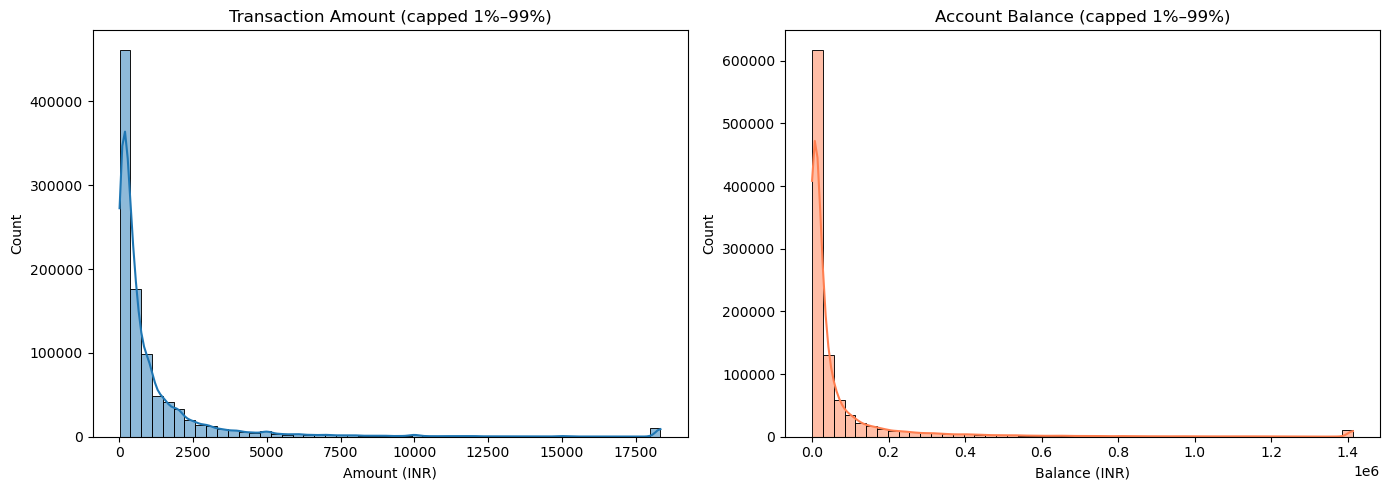

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(eda["TransactionAmount"], kde=True, ax=axes[0], bins=50)
axes[0].set_title("Transaction Amount (capped 1%–99%)")
axes[0].set_xlabel("Amount (INR)")
sns.histplot(eda["CustAccountBalance"], kde=True, ax=axes[1], bins=50, color="coral")
axes[1].set_title("Account Balance (capped 1%–99%)")
axes[1].set_xlabel("Balance (INR)")
plt.tight_layout()
plt.show()

#### Insights:

Both distributions remain right-skewed even after capping
Most transactions are small (mode ~₹500); most balances are low-to-mid range
Long tail suggests a small group of high-value customers drives large monetary volume

In [15]:
from IPython.display import Markdown, display


,AgeBand,transactions,customers,avg_transaction,median_balance,total_value
0,<25,223368,214966,840.451829,8392.82,1.877300e+08
1,25-40,649224,582767,1409.164971,17799.50,9.148637e+08
2,41-60,98611,96934,2827.466016,41935.66,2.788193e+08
3,60+,14068,14025,3524.461025,53209.37,4.958212e+07


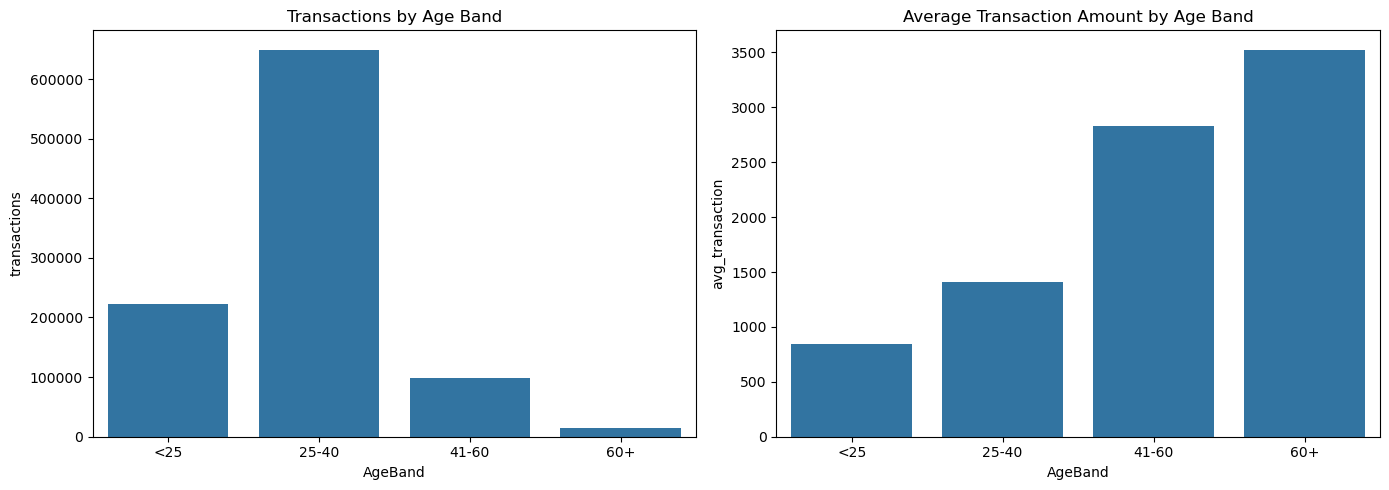

**Business insight:** Identify age bands with high avg_transaction but low customer count — these are prime cross-sell targets. Younger segments with frequent small transactions might be best for digital product upsell.

In [43]:
# Create age bands
bins = [0, 24, 40, 60, 120]
labels = ['<25','25-40','41-60','60+']
data['AgeBand'] = pd.cut(data['Age'], bins=bins, labels=labels, ordered=True)

# Aggregate per age band
age_summary = data.groupby('AgeBand').agg(
    transactions=('TransactionID','count'),
    customers=('CustomerID', pd.Series.nunique),
    avg_transaction=('TransactionAmount','mean'),
    median_balance=('CustAccountBalance','median'),
    total_value=('TransactionAmount','sum')
).reset_index()

display(age_summary)

# Plots: transactions and avg transaction value
fig, axes = plt.subplots(1,2, figsize=(14,5))
sns.barplot(x='AgeBand', y='transactions', data=age_summary, ax=axes[0])
axes[0].set_title('Transactions by Age Band')
sns.barplot(x='AgeBand', y='avg_transaction', data=age_summary, ax=axes[1])
axes[1].set_title('Average Transaction Amount by Age Band')
plt.tight_layout()
plt.show()

display(Markdown("**Business insight:** Identify age bands with high avg_transaction but low customer count — these are prime cross-sell targets. Younger segments with frequent small transactions might be best for digital product upsell."))


,BalanceTier,transactions,customers,avg_txn,total_value,median_balance
0,High,335008,316352,2299.620088,7.703911e+08,93019.59
1,Low,325157,307785,876.147633,2.848855e+08,1986.15
2,Medium,325157,307314,1155.840994,3.758298e+08,15645.72


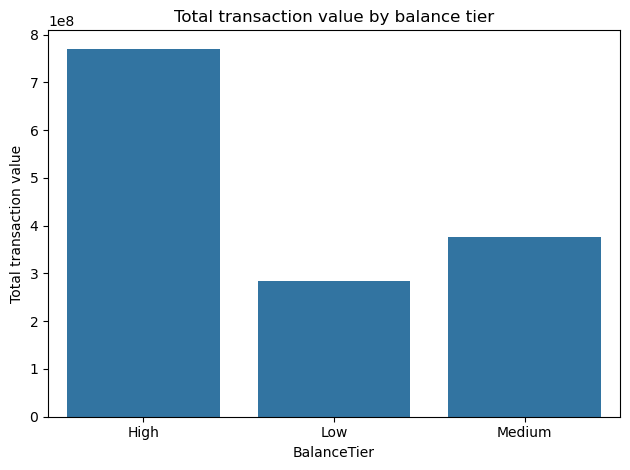

**Business insight:** If High balance tier has low transaction frequency but high balances, run targeted engagement (fee waivers, concierge, wealth advisory) to activate deposits/investments.

In [18]:
# Define balance tiers by percentiles
quantiles = data['CustAccountBalance'].quantile([0.33, 0.66]).values
def balance_tier(x):
    if x <= quantiles[0]:
        return 'Low'
    elif x <= quantiles[1]:
        return 'Medium'
    else:
        return 'High'
data['BalanceTier'] = data['CustAccountBalance'].apply(balance_tier)

bal_summary = data.groupby('BalanceTier').agg(
    transactions=('TransactionID','count'),
    customers=('CustomerID', pd.Series.nunique),
    avg_txn=('TransactionAmount','mean'),
    total_value=('TransactionAmount','sum'),
    median_balance=('CustAccountBalance','median')
).reset_index()
display(bal_summary)

# Plot total_value by tier
sns.barplot(x='BalanceTier', y='total_value', data=bal_summary)
plt.title('Total transaction value by balance tier')
plt.ylabel('Total transaction value')
plt.tight_layout()
plt.show()

display(Markdown("**Business insight:** If High balance tier has low transaction frequency but high balances, run targeted engagement (fee waivers, concierge, wealth advisory) to activate deposits/investments."))


,CustLocationClean,transactions,customers,total_value,median_balance
4624,MUMBAI,97680,96038,1.616955e+08,23418.890
5064,NEW DELHI,76380,75293,1.305968e+08,24614.250
672,BANGALORE,77751,76645,1.054833e+08,16345.040
2689,GURGAON,70518,69622,1.011668e+08,24929.980
1805,DELHI,67335,66486,9.302718e+07,17949.410
5149,NOIDA,31675,31472,4.189667e+07,21264.590
3739,KOLKATA,19033,18942,4.072906e+07,17354.810
1409,CHENNAI,27500,27352,3.824579e+07,14143.600
5841,PUNE,24493,24370,3.496158e+07,14808.780
2954,HYDERABAD,21819,21712,3.085922e+07,12606.960


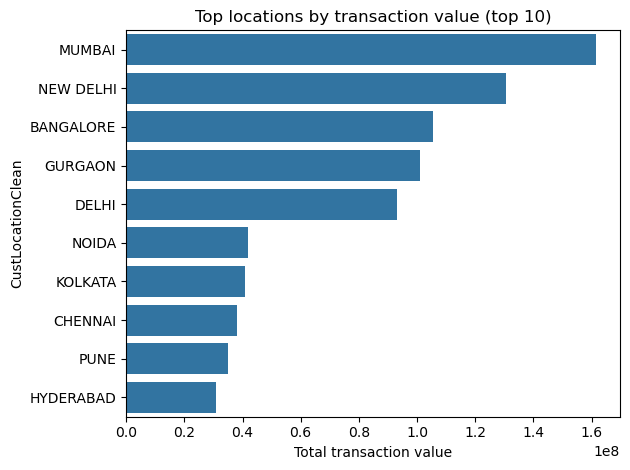

**Business insight:** Regions with high total_value and high median_balance are ideal for premium product pilots. Regions with high customer count but low value need cost-efficient retention campaigns.

In [19]:
# Clean location names a bit (strip case)
data['CustLocationClean'] = data['CustLocation'].str.upper().str.strip().fillna('UNKNOWN')

loc_summary = data.groupby('CustLocationClean').agg(
    transactions=('TransactionID','count'),
    customers=('CustomerID', pd.Series.nunique),
    total_value=('TransactionAmount','sum'),
    median_balance=('CustAccountBalance','median')
).reset_index().sort_values('total_value', ascending=False).head(20)

display(loc_summary)

# Plot top 10 locations by total_value
sns.barplot(y='CustLocationClean', x='total_value', data=loc_summary.head(10))
plt.title('Top locations by transaction value (top 10)')
plt.xlabel('Total transaction value')
plt.tight_layout()
plt.show()

display(Markdown("**Business insight:** Regions with high total_value and high median_balance are ideal for premium product pilots. Regions with high customer count but low value need cost-efficient retention campaigns."))


,CustLocationClean,transactions,customers,total_value,median_balance
4624,MUMBAI,97680,96038,1.616955e+08,23418.890
5064,NEW DELHI,76380,75293,1.305968e+08,24614.250
672,BANGALORE,77751,76645,1.054833e+08,16345.040
2689,GURGAON,70518,69622,1.011668e+08,24929.980
1805,DELHI,67335,66486,9.302718e+07,17949.410
5149,NOIDA,31675,31472,4.189667e+07,21264.590
3739,KOLKATA,19033,18942,4.072906e+07,17354.810
1409,CHENNAI,27500,27352,3.824579e+07,14143.600
5841,PUNE,24493,24370,3.496158e+07,14808.780
2954,HYDERABAD,21819,21712,3.085922e+07,12606.960


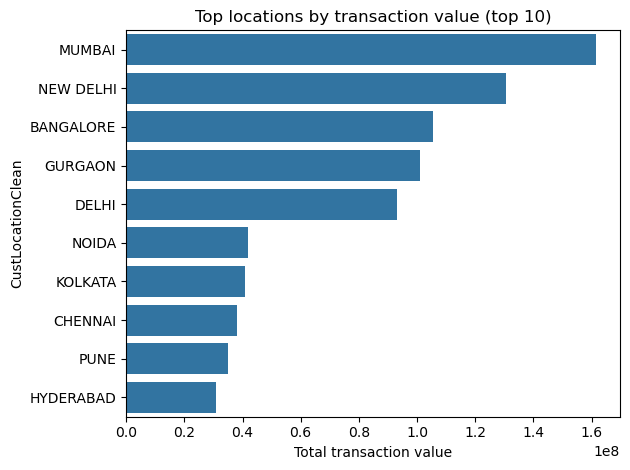

**Business insight:** Regions with high total_value and high median_balance are ideal for premium product pilots. Regions with high customer count but low value need cost-efficient retention campaigns.

In [20]:
# Clean location names a bit (strip case)
data['CustLocationClean'] = data['CustLocation'].str.upper().str.strip().fillna('UNKNOWN')

loc_summary = data.groupby('CustLocationClean').agg(
    transactions=('TransactionID','count'),
    customers=('CustomerID', pd.Series.nunique),
    total_value=('TransactionAmount','sum'),
    median_balance=('CustAccountBalance','median')
).reset_index().sort_values('total_value', ascending=False).head(20)

display(loc_summary)

# Plot top 10 locations by total_value
sns.barplot(y='CustLocationClean', x='total_value', data=loc_summary.head(10))
plt.title('Top locations by transaction value (top 10)')
plt.xlabel('Total transaction value')
plt.tight_layout()
plt.show()

display(Markdown("**Business insight:** Regions with high total_value and high median_balance are ideal for premium product pilots. Regions with high customer count but low value need cost-efficient retention campaigns."))


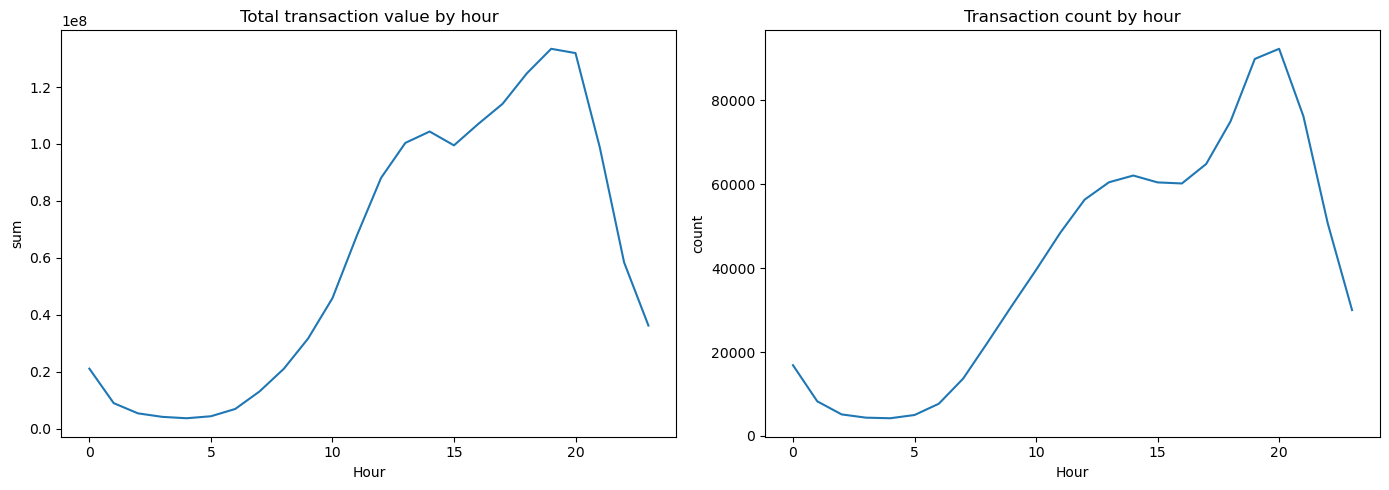

**Business insight:** Use hourly peaks to schedule push notifications, maintenance windows, and staff allocation for call centers.

In [21]:
# Create TransactionHour column
data['TransactionHour'] = data['TransactionDatetime'].dt.hour

# Hourly pattern (across days)
hourly = data.groupby('TransactionHour')['TransactionAmount'].agg(['count','sum','mean']).reset_index().sort_values('TransactionHour')

fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.lineplot(x='TransactionHour', y='sum', data=hourly, ax=ax[0])
ax[0].set_title('Total transaction value by hour')
ax[0].set_xlabel('Hour')
sns.lineplot(x='TransactionHour', y='count', data=hourly, ax=ax[1])
ax[1].set_title('Transaction count by hour')
ax[1].set_xlabel('Hour')
plt.tight_layout()
plt.show()

display(Markdown("**Business insight:** Use hourly peaks to schedule push notifications, maintenance windows, and staff allocation for call centers.")) 


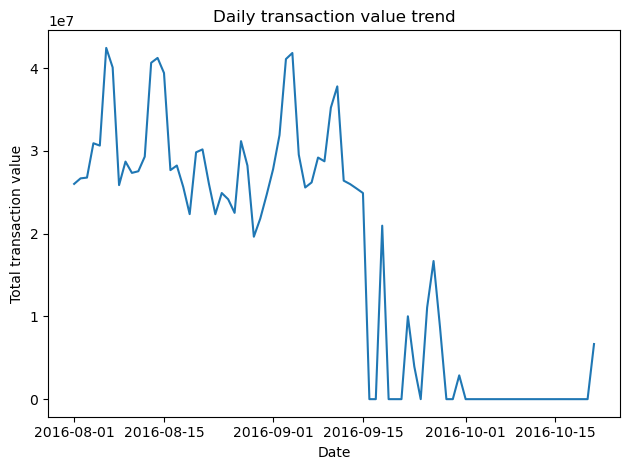

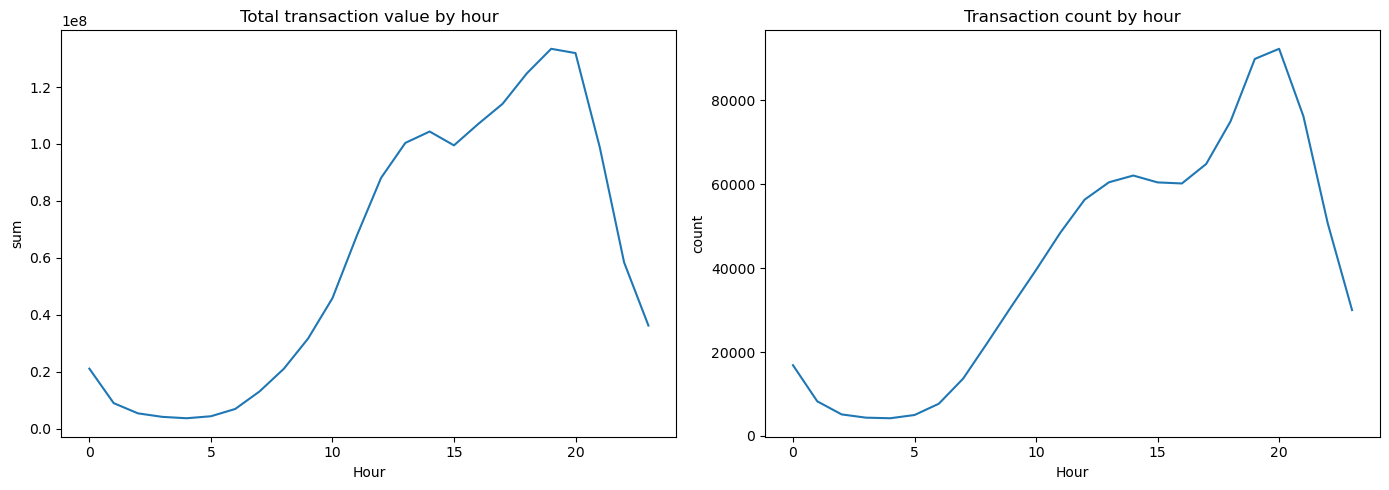

**Business insight:** Use hourly peaks to schedule push notifications, maintenance windows, and staff allocation for call centers.

In [22]:
# Daily trend (only if multiple days)
if data['TransactionDatetime'].dt.date.nunique() > 1:
    daily = data.set_index('TransactionDatetime').resample('D')['TransactionAmount'].sum().reset_index()
    sns.lineplot(x='TransactionDatetime', y='TransactionAmount', data=daily)
    plt.title('Daily transaction value trend')
    plt.xlabel('Date')
    plt.ylabel('Total transaction value')
    plt.tight_layout()
    plt.show()
else:
    display(Markdown("Not enough distinct dates to show daily trend."))

# Hourly pattern (across days)
hourly = data.groupby('TransactionHour')['TransactionAmount'].agg(['count','sum','mean']).reset_index().sort_values('TransactionHour')
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.lineplot(x='TransactionHour', y='sum', data=hourly, ax=ax[0])
ax[0].set_title('Total transaction value by hour')
ax[0].set_xlabel('Hour')
sns.lineplot(x='TransactionHour', y='count', data=hourly, ax=ax[1])
ax[1].set_title('Transaction count by hour')
ax[1].set_xlabel('Hour')
plt.tight_layout()
plt.show()

display(Markdown("**Business insight:** Use hourly peaks to schedule push notifications, maintenance windows, and staff allocation for call centers."))


### RFM SEGMENTATION


### Compute RFM features

In [27]:
snapshot_date = data["TransactionDate"].max() + pd.Timedelta(days=1)

rfm = data.groupby("CustomerID").agg(
    recency_days=("TransactionDate", lambda x: (snapshot_date - x.max()).days),
    frequency=("TransactionID", "count"),
    monetary=("TransactionAmount", "sum")
).reset_index()

print(f"RFM table: {len(rfm):,} customers")
rfm.head(10)

RFM table: 839,081 customers


,CustomerID,recency_days,frequency,monetary
0,C1010011,26,2,5106.0
1,C1010012,69,1,1499.0
2,C1010014,76,2,1455.0
3,C1010018,37,1,30.0
4,C1010024,65,1,5000.0
5,C1010028,54,1,557.0
6,C1010031,79,2,1864.0
7,C1010035,56,2,750.0
8,C1010036,57,1,208.0
9,C1010037,74,1,19680.0


### Assign RFM scores(quintiles 1-5)

#### we score each metric using quantiles(divide customers into 5 equal groups)
1. R score 5 = most recent, 1 = least recent (inverted because lower recency days = better)
2. F score 5 = most frequent, 1 = least frequent
3. M score 5 = highest spender, 1 = least spender

In [31]:
rfm["R_score"] = pd.qcut(rfm["recency_days"].rank(method="first"), 5, labels=[5,4,3,2,1]).astype(int)
rfm["F_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1,2,3,4,5]).astype(int)
rfm["M_score"] = pd.qcut(rfm["monetary"].rank(method="first"), 5, labels=[1,2,3,4,5]).astype(int)

rfm["RFM_score"] = rfm["R_score"].astype(str) + rfm["F_score"].astype(str) + rfm["M_score"].astype(str)

rfm.head(10)


,CustomerID,recency_days,frequency,monetary,R_score,F_score,M_score,RFM_score
0,C1010011,26,2,5106.0,5,5,5,555
1,C1010012,69,1,1499.0,2,1,4,214
2,C1010014,76,2,1455.0,1,5,4,154
3,C1010018,37,1,30.0,5,1,1,511
4,C1010024,65,1,5000.0,2,1,5,215
5,C1010028,54,1,557.0,3,1,3,313
6,C1010031,79,2,1864.0,1,5,5,155
7,C1010035,56,2,750.0,3,5,3,353
8,C1010036,57,1,208.0,3,1,2,312
9,C1010037,74,1,19680.0,1,1,5,115


### Map scores to business segments

In [32]:
def assign_segment(row):
    r, f, m = row["R_score"], row["F_score"], row["M_score"]

    if r >= 4 and f >= 4 and m >= 4:
        return "Champions"
    elif r >= 3 and f >= 3 and m >= 3:
        return "Loyal"
    elif r >= 2 and f >= 2 and m >= 2:
        return "Potential Loyalists"
    elif r <= 2 and f <= 2 and m <= 2:
        return "At Risk"
    elif r <= 2 and f >= 4:
        return "Need Attention"
    else:
        return "Others"

rfm["segment"] = rfm.apply(assign_segment, axis=1)

rfm["segment"].value_counts()


segment
Others                 279960
Potential Loyalists    234119
Loyal                  124109
Champions               80217
Need Attention          64686
At Risk                 55990
Name: count, dtype: int64

In [33]:
profiles = rfm.groupby("segment").agg(
    customers=("CustomerID", "count"),
    avg_recency=("recency_days", "mean"),
    avg_frequency=("frequency", "mean"),
    avg_monetary=("monetary", "mean")
).round(2).sort_values("customers", ascending=False)

profiles
    

,customers,avg_recency,avg_frequency,avg_monetary
segment,,,,
Others,279960,57.57,1.01,1264.50
Potential Loyalists,234119,55.55,1.12,1575.63
Loyal,124109,48.34,1.34,2236.54
Champions,80217,40.62,1.83,4163.32
Need Attention,64686,75.11,1.11,1376.88
At Risk,55990,73.10,1.00,135.77


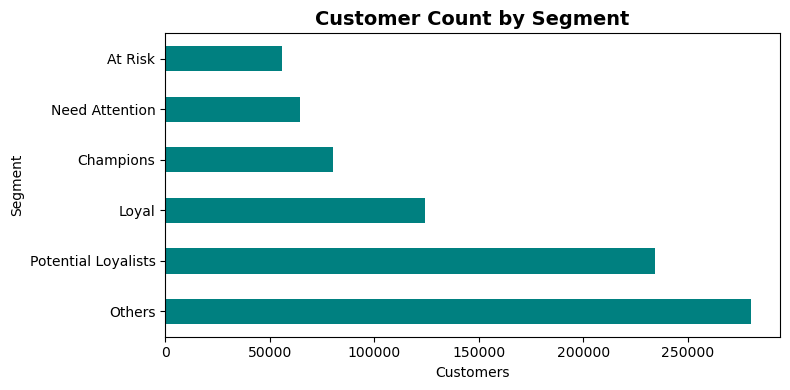

In [34]:
profiles["customers"].plot.barh(figsize=(8, 4), color="teal")
plt.title("Customer Count by Segment", fontsize=14, fontweight="bold")
plt.xlabel("Customers")
plt.ylabel("Segment")
plt.tight_layout()
plt.show()

In [35]:
### SAVE OUTPUT
from pathlib import Path

out_dir = Path("../data/processed")
out_dir.mkdir(parents=True, exist_ok=True)

data.to_csv(out_dir / "transactions_clean.csv", index=False)
rfm.to_csv(out_dir / "rfm_scores.csv", index=False)

print("✅ Saved:")
print(f"  - transactions_clean.csv ({len(data):,} rows)")
print(f"  - rfm_scores.csv ({len(rfm):,} rows)")

✅ Saved:
  - transactions_clean.csv (985,322 rows)
  - rfm_scores.csv (839,081 rows)
